In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import datetime as dt
import yaml
from pandas.tseries import offsets
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullLocator)
import matplotlib.dates as mdates

In [368]:
swq = pd.read_csv('../input/RadarBoxSWQ20200112-20200411.csv', sep='|', quotechar='"')

In [369]:
wal = pd.read_csv('../input/RadarBoxWAL20200116-20200408.csv', sep='|', quotechar='"')

In [370]:
swq.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration
0,11-Apr,WQ3612,"Dallas, TX (DAL/KDAL)",18:35 CDT,"San Antonio, TX (SAT/KSAT)",-,B734 (N458UW),Est. Arrival 19:43 CDT,00h52m
1,11-Apr,WQ3611,"Harrisburg, PA (MDT/KMDT)",15:05 EDT,"Dallas, TX (DAL/KDAL)",-,B734 (N458UW),Landed 17:30 CDT,03h16m
2,11-Apr,WQ3610,"Buffalo, NY (BUF/KBUF)",13:15 EDT,"Harrisburg, PA (MDT/KMDT)",-,B734 (N458UW),Landed,00h38m
3,11-Apr,WQ3609,"San Antonio, TX (SAT/KSAT)",08:00 CDT,"Buffalo, NY (BUF/KBUF)",-,B734 (N458UW),Landed 11:58 EDT,02h46m
4,10-Apr,WQ3538,"Alexandria, LA (AEX/KAEX)",15:20 CDT,"Brownsville, TX (BRO/KBRO)",-,B733 (N626SW),Landed,01h17m


In [371]:
wal.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration
0,8 Apr,WAL700,"Charlotte, NC(CLT/KCLT)",-,"Miami, FL(MIA/KMIA)",-,MD83 (N801WA),Landed 18:17 EDT,01h26m
1,8 Apr,WAL9700,"Charlotte, NC(CLT/KCLT)",15:30 EDT,"Miami, FL(MIA/KMIA)",-,MD83,Landed,01h27m
2,8 Apr,WAL700,Basseterre(SKB/TKPK),10:00 AST,"Charlotte, NC(CLT/KCLT)",-,MD83 (N801WA),Landed 15:13 EDT,04h07m
3,8 Apr,WAL9699,"Miami, FL(MIA/KMIA)",05:45 EDT,Basseterre(SKB/TKPK),-,MD83 (N801WA),Landed,02h25m
4,4 Apr,WAL9700,"Charlotte, NC(CLT/KCLT)",-,"Miami, FL(MIA/KMIA)",-,MD83 (N801WA),Landed 19:56 EDT,01h26m


In [372]:
swq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 9 columns):
Date         4957 non-null object
Flight       4957 non-null object
Departure    4957 non-null object
STD          4957 non-null object
Arrival      4957 non-null object
STA          4957 non-null object
Aircraft     4957 non-null object
Status       4957 non-null object
Duration     4957 non-null object
dtypes: object(9)
memory usage: 348.6+ KB


In [373]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
Date         752 non-null object
Flight       752 non-null object
Departure    752 non-null object
STD          752 non-null object
Arrival      752 non-null object
STA          752 non-null object
Aircraft     752 non-null object
Status       752 non-null object
Duration     752 non-null object
dtypes: object(9)
memory usage: 53.0+ KB


In [374]:
swq['Date'] = [x + ' 2020' for x in swq['Date']]
wal['Date'] = [x + ' 2020' for x in wal['Date']]

In [375]:
swq['Date'] = pd.to_datetime(swq['Date'])
wal['Date'] = pd.to_datetime(wal['Date'])

In [376]:
swq['Airline'] = 'SwiftAir/iAero'
wal['Airline'] = 'World Atlantic'

In [377]:
swq = swq.replace('-', np.nan)
wal = wal.replace('-', np.nan)
swq = swq.replace(u'\xa0', ' ')
wal = wal.replace(u'\xa0', ' ')

In [389]:
swq.set_index('Date').loc['2020-04-07']

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline
Date,,,,,,,,,
2020-04-07,WQ3535,"Alexandria, LA (AEX/KAEX)",15:55 CDT,"Brownsville, TX (BRO/KBRO)",NaN,B734 (N418US),Landed,01h12m,SwiftAir/iAero
2020-04-07,WQ3543,NaN,NaN,NaN,NaN,B733 (N626SW),Landed,NaN,SwiftAir/iAero
2020-04-07,WQ3529,Guatemala City (GUA/MGGT),12:00 CST,"San Antonio, TX (SAT/KSAT)",NaN,B734 (N458UW),Landed 16:05 CDT,02h38m,SwiftAir/iAero
2020-04-07,WQ3602,San Salvador (SAL/MSLP),12:00 CST,"San Antonio, TX (SAT/KSAT)",NaN,B734 (N803TJ),Landed 17:12 CDT,02h50m,SwiftAir/iAero
2020-04-07,WQ3534,"Richmond, VA (RIC/KRIC)",13:30 EDT,"Alexandria, LA (AEX/KAEX)",NaN,B734 (N418US),Landed,02h35m,SwiftAir/iAero
2020-04-07,WQ3549,Santo Domingo (SDQ/MDSD),12:00 AST,"Miami, FL (MIA/KMIA)",NaN,B734 (N441US),Landed 17:12 EDT,02h05m,SwiftAir/iAero
2020-04-07,WQ3533,"Toledo, OH (TOL/KTOL)",11:10 EDT,"Richmond, VA (RIC/KRIC)",NaN,B734 (N418US),Landed 12:13 EDT,00h59m,SwiftAir/iAero
2020-04-07,WQ405,Santo Domingo (SDQ/MDSD),11:00 AST,"Miami, FL (MIA/KMIA)",NaN,B733 (N811TJ),Landed 12:08 EDT,02h06m,SwiftAir/iAero
2020-04-07,WQ3528,"Brownsville, TX (BRO/KBRO)",09:35 CDT,Guatemala City (GUA/MGGT),NaN,B734 (N458UW),Landed,02h10m,SwiftAir/iAero


In [304]:
df = pd.concat([swq, wal]).reset_index(drop=True)

In [305]:
df['Aircraft'] = df['Aircraft'].str.replace(u'\xa0', ' ')
df['Arrival'] = df['Arrival'].str.replace(u'\xa0', ' ')
df['Departure'] = df['Departure'].str.replace(u'\xa0', ' ')

In [306]:
df.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline
0,2020-04-11,WQ3612,"Dallas, TX (DAL/KDAL)",18:35 CDT,"San Antonio, TX (SAT/KSAT)",NaN,B734 (N458UW),Est. Arrival 19:43 CDT,00h52m,SwiftAir/iAero
1,2020-04-11,WQ3611,"Harrisburg, PA (MDT/KMDT)",15:05 EDT,"Dallas, TX (DAL/KDAL)",NaN,B734 (N458UW),Landed 17:30 CDT,03h16m,SwiftAir/iAero
2,2020-04-11,WQ3610,"Buffalo, NY (BUF/KBUF)",13:15 EDT,"Harrisburg, PA (MDT/KMDT)",NaN,B734 (N458UW),Landed,00h38m,SwiftAir/iAero
3,2020-04-11,WQ3609,"San Antonio, TX (SAT/KSAT)",08:00 CDT,"Buffalo, NY (BUF/KBUF)",NaN,B734 (N458UW),Landed 11:58 EDT,02h46m,SwiftAir/iAero
4,2020-04-10,WQ3538,"Alexandria, LA (AEX/KAEX)",15:20 CDT,"Brownsville, TX (BRO/KBRO)",NaN,B733 (N626SW),Landed,01h17m,SwiftAir/iAero


In [307]:
df.set_index('Date').groupby(pd.Grouper(freq='M'))['Flight'].count()

Date
2020-01-31    1483
2020-02-29    2338
2020-03-31    1745
2020-04-30     143
Freq: M, Name: Flight, dtype: int64

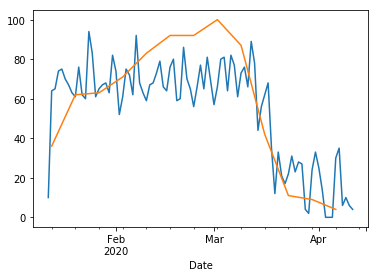

In [382]:
swq.set_index('Date').groupby(pd.Grouper(freq='D'))['Flight'].count().plot()
wal.set_index('Date').groupby(pd.Grouper(freq='W'))['Flight'].count().plot()

In [309]:
temp = df['Arrival'].str.split('(', expand=True)
df['ArrivalLoc'] = temp[0].str.strip()
temp = temp[1].str.split('/', expand=True)
df['ArrivalIATA'] = temp[0]
df['ArrivalICAO'] = temp[1]
df['ArrivalICAO'] = df['ArrivalICAO'].str.replace(')', '')

In [310]:
temp = df['Departure'].str.split('(', expand=True)
df['DepartureLoc'] = temp[0].str.strip()
temp = temp[1].str.split('/', expand=True)
df['DepartureIATA'] = temp[0]
df['DepartureICAO'] = temp[1]
df['DepartureICAO'] = df['DepartureICAO'].str.replace(')', '')

In [311]:
df.groupby('DepartureICAO')['Flight'].count().sort_values(ascending=False).head(30)

DepartureICAO
KMIA    1129
MUHA     359
KAEX     188
KBRO     183
MDSD     165
KIWA     141
MUSC     120
KSAT     118
MGGT     101
MUHG      82
MUCM      76
MWCR      67
KACY      66
MHLM      62
MDPC      58
KELP      58
KEWR      55
KIFP      53
KCSG      53
KGSO      53
KBNA      52
KRDU      48
KTPA      47
KMEM      45
TJSJ      38
MUCU      38
KIAH      38
KPHL      37
KDAL      37
KSYR      36
Name: Flight, dtype: int64

In [312]:
df.groupby(['DepartureICAO', 'ArrivalICAO'])['Flight'].count().sort_values(ascending=False).head(25)

DepartureICAO  ArrivalICAO
MUHA           KMIA           345
KMIA           MUHA           341
MDSD           KMIA           157
KMIA           MDSD           155
               MUSC           113
MUSC           KMIA           110
MUCM           KMIA            76
KMIA           MUHG            76
MUHG           KMIA            76
KMIA           MUCM            72
               MDPC            60
MDPC           KMIA            56
KAEX           KBRO            45
KMIA           MUCU            38
MUCU           KMIA            38
KSAT           KBRO            35
KBRO           MGGT            32
TJSJ           KMIA            31
KMIA           KCSG            31
KBRO           KAEX            30
MGGT           KIWA            30
KMIA           TJSJ            28
MUVR           KMIA            26
KBRO           MHLM            26
KMIA           MUVR            25
Name: Flight, dtype: int64

In [313]:
ice_us = ["Alexandria, LA (AEX/KAEX)",
#           "Phoenix, AZ (AZA/KIWA)",
          "Brownsville, TX (BRO/KBRO)",
#           "El Paso, TX (ELP/KELP)",
#           "San Antonio, TX (SAT/KSAT)",
          "Yakima, WA (YKM/KYKM)"]

In [314]:
df[df['Departure'].isin(ice_us)].set_index('Date').groupby(pd.Grouper(freq='M'))['Flight'].count()

Date
2020-01-31     54
2020-02-29    110
2020-03-31    105
2020-04-30     36
Freq: M, Name: Flight, dtype: int64

In [315]:
len(set(df['Aircraft']))

50

In [316]:
set(df['Aircraft'].head())

{'B733 (N626SW)', 'B734 (N458UW)'}

In [317]:
ice_flights = set(df[df['Departure'].isin(ice_us)]['Aircraft'])

In [318]:
ice_flights = ice_flights.union(set(df[df['Arrival'].isin(ice_us)]['Aircraft']))

In [319]:
df[df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='M'))['Aircraft'].count()

Date
2020-01-31    1035
2020-02-29    1507
2020-03-31    1216
2020-04-30     106
Freq: M, Name: Aircraft, dtype: int64

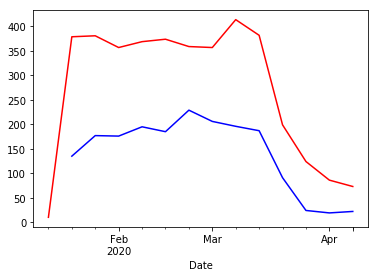

In [332]:
df[df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='W'))['Aircraft'].count().plot(c='r')
df[~df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='W'))['Aircraft'].count().plot(c='b')

In [333]:
df[df['Aircraft'].isin(ice_flights)]

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
0,2020-04-11,WQ3612,"Dallas, TX (DAL/KDAL)",18:35 CDT,"San Antonio, TX (SAT/KSAT)",NaN,B734 (N458UW),Est. Arrival 19:43 CDT,00h52m,SwiftAir/iAero,"San Antonio, TX",SAT,KSAT,"Dallas, TX",DAL,KDAL
1,2020-04-11,WQ3611,"Harrisburg, PA (MDT/KMDT)",15:05 EDT,"Dallas, TX (DAL/KDAL)",NaN,B734 (N458UW),Landed 17:30 CDT,03h16m,SwiftAir/iAero,"Dallas, TX",DAL,KDAL,"Harrisburg, PA",MDT,KMDT
2,2020-04-11,WQ3610,"Buffalo, NY (BUF/KBUF)",13:15 EDT,"Harrisburg, PA (MDT/KMDT)",NaN,B734 (N458UW),Landed,00h38m,SwiftAir/iAero,"Harrisburg, PA",MDT,KMDT,"Buffalo, NY",BUF,KBUF
3,2020-04-11,WQ3609,"San Antonio, TX (SAT/KSAT)",08:00 CDT,"Buffalo, NY (BUF/KBUF)",NaN,B734 (N458UW),Landed 11:58 EDT,02h46m,SwiftAir/iAero,"Buffalo, NY",BUF,KBUF,"San Antonio, TX",SAT,KSAT
4,2020-04-10,WQ3538,"Alexandria, LA (AEX/KAEX)",15:20 CDT,"Brownsville, TX (BRO/KBRO)",NaN,B733 (N626SW),Landed,01h17m,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,"Alexandria, LA",AEX,KAEX
5,2020-04-10,WQ3537,"Gary, IN (GYY/KGYY)",12:05 CDT,"Alexandria, LA (AEX/KAEX)",NaN,B733 (N626SW),Landed,01h52m,SwiftAir/iAero,"Alexandria, LA",AEX,KAEX,"Gary, IN",GYY,KGYY
6,2020-04-10,WQ3608,San Salvador (SAL/MSLP),11:00 CST,"San Antonio, TX (SAT/KSAT)",NaN,B734 (N803TJ),Landed 14:30 CDT,02h54m,SwiftAir/iAero,"San Antonio, TX",SAT,KSAT,San Salvador,SAL,MSLP
7,2020-04-10,WQ3536,"Brownsville, TX (BRO/KBRO)",08:00 CDT,"Gary, IN (GYY/KGYY)",NaN,B733 (N626SW),Landed,02h39m,SwiftAir/iAero,"Gary, IN",GYY,KGYY,"Brownsville, TX",BRO,KBRO
8,2020-04-10,WQ3607,"Alexandria, LA (AEX/KAEX)",07:55 CDT,San Salvador (SAL/MSLP),NaN,B734 (N803TJ),Landed,02h45m,SwiftAir/iAero,San Salvador,SAL,MSLP,"Alexandria, LA",AEX,KAEX
9,2020-04-10,WQ3606,"San Antonio, TX (SAT/KSAT)",05:40 CDT,"Alexandria, LA (AEX/KAEX)",NaN,B734 (N803TJ),Landed,00h57m,SwiftAir/iAero,"Alexandria, LA",AEX,KAEX,"San Antonio, TX",SAT,KSAT


In [354]:
targets = ['Guatemala City (GUA/MGGT)']
stop_cols = ['Departure', 'Arrival']

In [355]:
target_found = df[stop_cols].apply(lambda x: x.isin(targets)).sum(axis=1) > 0

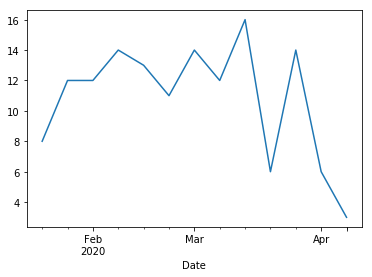

In [356]:
df[target_found].set_index('Date').groupby(pd.Grouper(freq='W'))['Flight'].count().plot()

In [357]:
df['Departure'].unique()

array(['Dallas, TX (DAL/KDAL)', 'Harrisburg, PA (MDT/KMDT)',
       'Buffalo, NY (BUF/KBUF)', 'San Antonio, TX (SAT/KSAT)',
       'Alexandria, LA (AEX/KAEX)', 'Gary, IN (GYY/KGYY)',
       'San Salvador (SAL/MSLP)', 'Brownsville, TX (BRO/KBRO)',
       'Columbus, GA (CSG/KCSG)', 'San Juan (SJU/TJSJ)',
       'Miami, FL (MIA/KMIA)', nan, 'La Mesa (SAP/MHLM)',
       'Guatemala City (GUA/MGGT)', 'Richmond, VA (RIC/KRIC)',
       'Santo Domingo (SDQ/MDSD)', 'Toledo, OH (TOL/KTOL)',
       'Laredo, TX (LRD/KLRD)', 'El Paso, TX (ELP/KELP)',
       'Toronto, ON (YYZ/CYYZ)', 'Newark, NJ (EWR/KEWR)',
       'Columbus, OH (CMH/KCMH)', 'Houston, TX (IAH/KIAH)',
       'Phoenix, AZ (AZA/KIWA)', 'Quito (UIO/SEQM)',
       'Bridgetown (BGI/TBPB)', 'Kansas City, MO (MCI/KMCI)',
       'Managua (MGA/MNMG)', 'Omaha, NE (OMA/KOMA)',
       'Port of Spain (POS/TTPP)', 'Minneapolis, MN (MSP/KMSP)',
       'San Diego, CA (SAN/KSAN)', 'Victorville, CA (VCV/KVCV)',
       'Las Vegas, NV (LAS/KLAS)', 'Zande

In [358]:
df[df['Arrival'] == 'Guatemala City (GUA/MGGT)'].set_index('Date').groupby(pd.Grouper(freq='W'))['Flight'].count()

Date
2020-01-19    4
2020-01-26    6
2020-02-02    6
2020-02-09    7
2020-02-16    7
2020-02-23    6
2020-03-01    7
2020-03-08    6
2020-03-15    8
2020-03-22    3
2020-03-29    7
2020-04-05    3
2020-04-12    2
Freq: W-SUN, Name: Flight, dtype: int64

In [359]:
df['Date'].min()

Timestamp('2020-01-12 00:00:00')

In [360]:
df['Date'].max()

Timestamp('2020-04-11 00:00:00')

In [328]:
df.to_csv('../output/RadarboxSWQ+WAL20200112-20200411.csv', sep=',', quotechar='"', encoding='utf-8')

In [361]:
mggt_all = df[target_found].sort_values(by='Date').set_index('Date')

In [362]:
mggt_all.to_csv('../output/MGGTAll20200112-20200411.csv', sep=',', quotechar='"', encoding='utf-8')

In [344]:
# mggt_arrivals = df[target_found].sort_values(by='Date').set_index('Date')

In [345]:
# mggt_arrivals.to_csv('../output/MGGTArrivals20200112-20200411.csv', sep=',', quotechar='"', encoding='utf-8')

In [346]:
mggt_arrivals.head()

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
Date,,,,,,,,,,,,,,,
2020-01-16,WQ3547,"Alexandria, LA (AEX/KAEX)",06:05 CST,Guatemala City (GUA/MGGT),NaN,B738 (N624XA),Landed,02h33m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Alexandria, LA",AEX,KAEX
2020-01-16,WQ3243,"El Paso, TX (ELP/KELP)",07:25 MST,Guatemala City (GUA/MGGT),NaN,B733 (N529AU),Landed,03h23m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"El Paso, TX",ELP,KELP
2020-01-17,WQ3600,"Alexandria, LA (AEX/KAEX)",08:15 CST,Guatemala City (GUA/MGGT),NaN,B738,Landed,02h32m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Alexandria, LA",AEX,KAEX
2020-01-17,WQ3507,"Phoenix, AZ (AZA/KIWA)",07:00 MST,Guatemala City (GUA/MGGT),NaN,B733 (N529AU),Landed,04h02m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Phoenix, AZ",AZA,KIWA
2020-01-20,WQ3540,"El Paso, TX (ELP/KELP)",07:25 MST,Guatemala City (GUA/MGGT),NaN,B733 (N626SW),Landed,03h19m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"El Paso, TX",ELP,KELP


In [348]:
mggt_arrivals.loc['2020-04-07']

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
Date,,,,,,,,,,,,,,,
2020-04-07,WQ3528,"Brownsville, TX (BRO/KBRO)",09:35 CDT,Guatemala City (GUA/MGGT),NaN,B734 (N458UW),Landed,02h10m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO
2020-04-07,WQ3528,"Brownsville, TX (BRO/KBRO)",09:35 CDT,Guatemala City (GUA/MGGT),NaN,B734 (N458UW),Landed,02h10m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO


In [350]:
print(len(mggt_arrivals))
print(len(mggt_arrivals.drop_duplicates()))

72
71


In [351]:
mggt_arrivals.loc['2020-04']

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
Date,,,,,,,,,,,,,,,
2020-04-02,WQ3525,"Brownsville, TX (BRO/KBRO)",14:35 CDT,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,02h07m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO
2020-04-07,WQ3528,"Brownsville, TX (BRO/KBRO)",09:35 CDT,Guatemala City (GUA/MGGT),NaN,B734 (N458UW),Landed,02h10m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO
2020-04-07,WQ3528,"Brownsville, TX (BRO/KBRO)",09:35 CDT,Guatemala City (GUA/MGGT),NaN,B734 (N458UW),Landed,02h10m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO


In [353]:
mggt_arrivals[mggt_arrivals['Aircraft']=="B733 (N531AU)"]

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
Date,,,,,,,,,,,,,,,
2020-01-24,WQ3509,"Phoenix, AZ (AZA/KIWA)",08:40 MST,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,03h57m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Phoenix, AZ",AZA,KIWA
2020-01-30,WQ3516,"El Paso, TX (ELP/KELP)",07:25 MST,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,03h15m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"El Paso, TX",ELP,KELP
2020-01-31,WQ3508,"Phoenix, AZ (AZA/KIWA)",07:00 MST,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,03h51m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Phoenix, AZ",AZA,KIWA
2020-02-10,WQ3532,"El Paso, TX (ELP/KELP)",06:25 MST,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,03h17m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"El Paso, TX",ELP,KELP
2020-02-12,WQ3530,"Brownsville, TX (BRO/KBRO)",08:25 CST,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,02h12m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO
2020-02-21,WQ3506,"Phoenix, AZ (AZA/KIWA)",07:00 MST,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,03h42m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Phoenix, AZ",AZA,KIWA
2020-02-27,WQ3519,"El Paso, TX (ELP/KELP)",07:25 MST,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,03h15m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"El Paso, TX",ELP,KELP
2020-03-06,WQ3514,"Phoenix, AZ (AZA/KIWA)",07:00 MST,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,03h51m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Phoenix, AZ",AZA,KIWA
2020-04-02,WQ3525,"Brownsville, TX (BRO/KBRO)",14:35 CDT,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,02h07m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO


In [364]:
mggt_all.loc['2020-04']

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
Date,,,,,,,,,,,,,,,
2020-04-02,WQ3525,"Brownsville, TX (BRO/KBRO)",14:35 CDT,Guatemala City (GUA/MGGT),NaN,B733 (N531AU),Landed,02h07m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO
2020-04-02,WQ3526,Guatemala City (GUA/MGGT),17:00 CST,"Phoenix, AZ (AZA/KIWA)",NaN,B733 (N531AU),Landed 19:51 MST,04h12m,SwiftAir/iAero,"Phoenix, AZ",AZA,KIWA,Guatemala City,GUA,MGGT
2020-04-07,WQ3528,"Brownsville, TX (BRO/KBRO)",09:35 CDT,Guatemala City (GUA/MGGT),NaN,B734 (N458UW),Landed,02h10m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO
2020-04-07,WQ3528,"Brownsville, TX (BRO/KBRO)",09:35 CDT,Guatemala City (GUA/MGGT),NaN,B734 (N458UW),Landed,02h10m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO
2020-04-07,WQ3529,Guatemala City (GUA/MGGT),12:00 CST,"San Antonio, TX (SAT/KSAT)",NaN,B734 (N458UW),Landed 16:05 CDT,02h38m,SwiftAir/iAero,"San Antonio, TX",SAT,KSAT,Guatemala City,GUA,MGGT


In [366]:
len(mggt_arrivals.loc['2020-03-12':'2020-04-14'])

18